<a href="https://colab.research.google.com/github/bellDataSc/Analise-e-Exploracao-do-ULID25k-Dataset/blob/main/An%C3%A1lise_e_Explora%C3%A7%C3%A3o_do_ULID25k_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
chubercik_ulid25k_path = kagglehub.dataset_download('chubercik/ulid25k')

print('Data source import complete.')


Data source import complete.


# Análise e Exploração do ULID25k Dataset

Este notebook tem como objetivo explorar e analisar o ULID25k dataset (Unsplash Lite Image Dataset), uma coleção de 24.976 imagens que retratam diversas cenas, com foco principal em paisagens naturais. Todas as imagens foram redimensionadas para que o lado mais longo não ultrapasse 1.024 pixels, garantindo um tamanho uniforme e adequado para processamento e análise.

Obrigada Jakub Marcowski.
https://www.kaggle.com/datasets/chubercik/ulid25k/code

# Objetivos do Notebook

## Exploração Inicial:

Carregar e inspecionar o dataset.

Verificar a distribuição das imagens e suas características.

## Pré-processamento:

Preparar as imagens para análise ou treinamento de modelos de machine learning.

## Análise e Visualização:

Realizar análises visuais e estatísticas das imagens.

Identificar padrões ou características predominantes nas cenas naturais.

## Aplicações:

Utilizar o dataset para treinar modelos de classificação de imagens, detecção de objetos ou outras tarefas de visão computacional.

Explorar técnicas de aprendizado profundo (deep learning) para extrair insights das imagens.

# Estrutura do Notebook
## Configuração do Ambiente:

Importação de bibliotecas essenciais (e.g., numpy, pandas, matplotlib, opencv, tensorflow/pytorch).

Carregamento do dataset.

## Exploração dos Dados:

Visualização de exemplos de imagens.

Análise de metadados (se disponíveis).

## Pré-processamento:

Redimensionamento, normalização ou aumento de dados (data augmentation).

## Análise e Modelagem:

Aplicação de técnicas de machine learning ou deep learning.

## Resultados e Conclusões:

Discussão dos resultados obtidos.

Sugestões para trabalhos futuros.

## Licenciamento e Uso
Este dataset é destinado exclusivamente para fins de pesquisa e educação. O uso das imagens deve seguir os termos da Unsplash License. Para mais informações, consulte: Unsplash License.

📌 Autor: Bel - Analista de Dados Técnica PL - Governo do Estado de São Paulo

Total de imagens no dataset: 24976


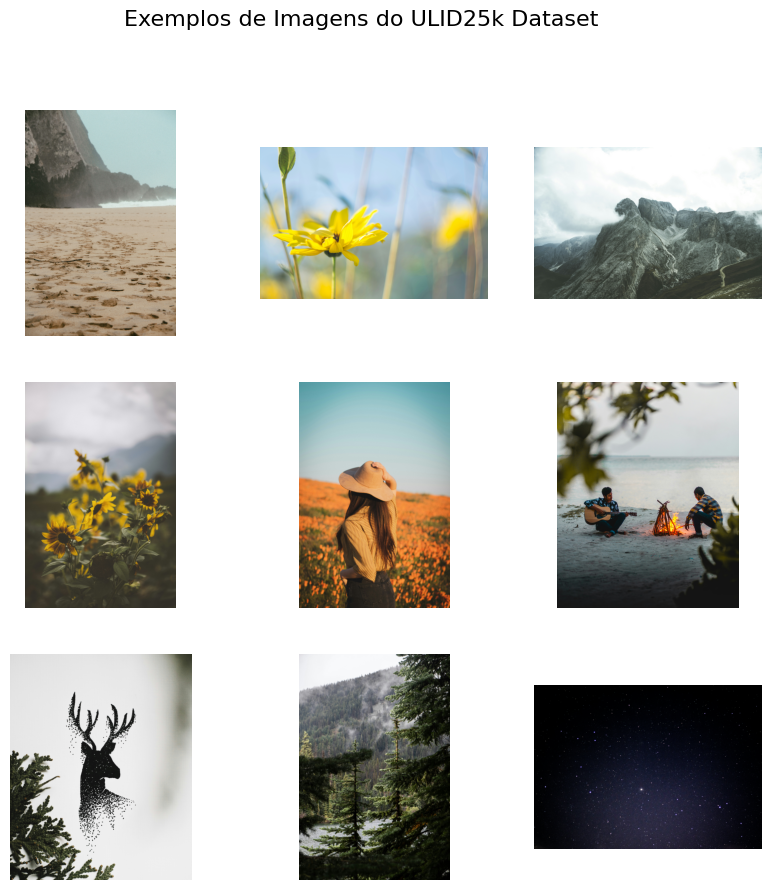

In [5]:
import os
import cv2
import matplotlib.pyplot as plt

# Caminho do dataset
DATA_DIR = '/kaggle/input/ulid25k'  # Ajuste conforme necessário

# Verificar se o diretório existe
if not os.path.exists(DATA_DIR):
    raise FileNotFoundError(f"O diretório {DATA_DIR} não foi encontrado. Verifique o caminho do dataset.")

# Listar todos os arquivos .png no dataset (incluindo subdiretórios)
image_files = []
for root, _, files in os.walk(DATA_DIR):
    for file in files:
        if file.endswith('.png'):
            image_files.append(os.path.join(root, file))

# Verificar se há imagens no dataset
print(f"Total de imagens no dataset: {len(image_files)}")
if len(image_files) == 0:
    raise ValueError("Nenhuma imagem foi encontrada no diretório especificado.")

# Exibir algumas imagens de exemplo
num_images_to_display = min(9, len(image_files))  # Exibir no máximo 9 imagens
plt.figure(figsize=(10, 10))
for i in range(num_images_to_display):
    img_path = image_files[i]
    img = cv2.imread(img_path)
    if img is None:
        print(f"Erro: Não foi possível carregar a imagem {img_path}.")
        continue
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Converter para RGB
    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.axis('off')
plt.suptitle('Exemplos de Imagens do ULID25k Dataset', fontsize=16)
plt.show()


# Outras maneiras de visualizar as imagens e realizar análises

## 1. Visualizar Imagens em Tons de Cinza


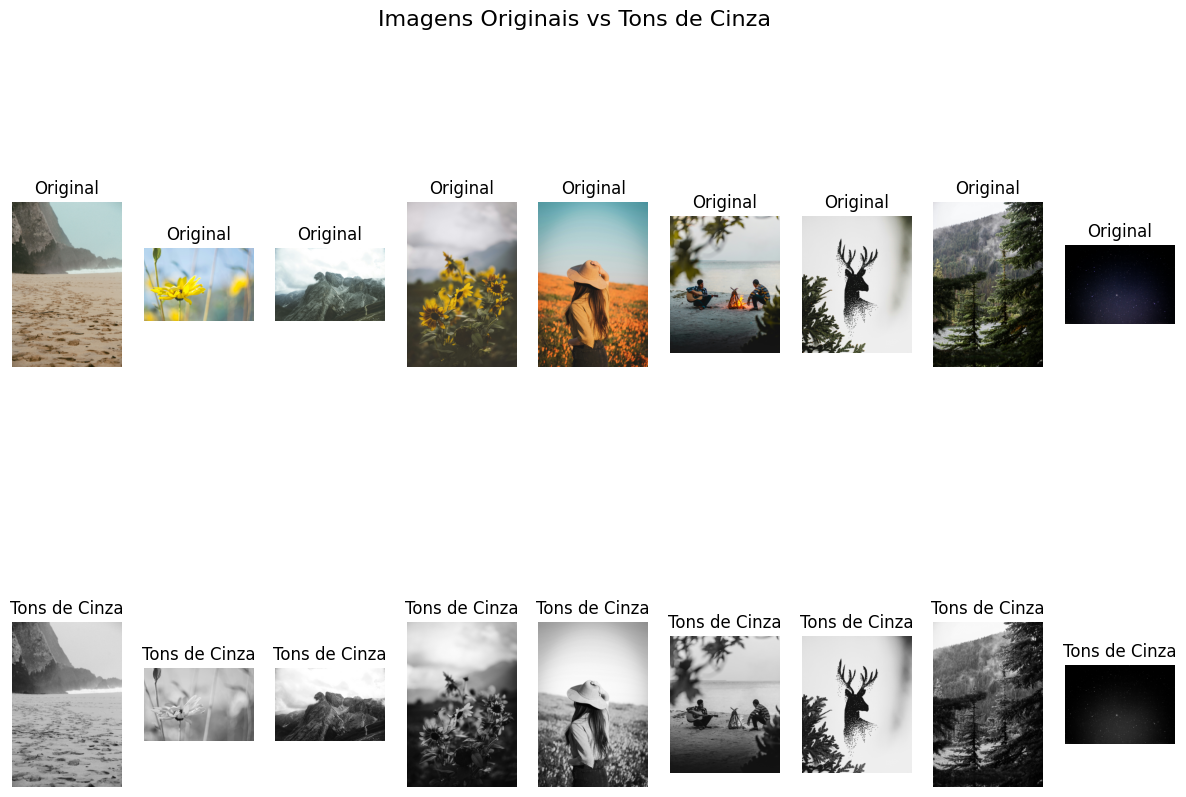

In [6]:
# Exibir imagens originais e em tons de cinza
plt.figure(figsize=(15, 10))
for i in range(num_images_to_display):
    img_path = image_files[i]
    img = cv2.imread(img_path)
    if img is None:
        print(f"Erro: Não foi possível carregar a imagem {img_path}.")
        continue
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Converter para RGB
    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)  # Converter para tons de cinza

    # Exibir imagem original
    plt.subplot(2, num_images_to_display, i + 1)
    plt.imshow(img)
    plt.title("Original")
    plt.axis('off')

    # Exibir imagem em tons de cinza
    plt.subplot(2, num_images_to_display, num_images_to_display + i + 1)
    plt.imshow(gray_img, cmap='gray')
    plt.title("Tons de Cinza")
    plt.axis('off')

plt.suptitle("Imagens Originais vs Tons de Cinza", fontsize=16)
plt.show()

## 2. Aplicar Filtros nas Imagens

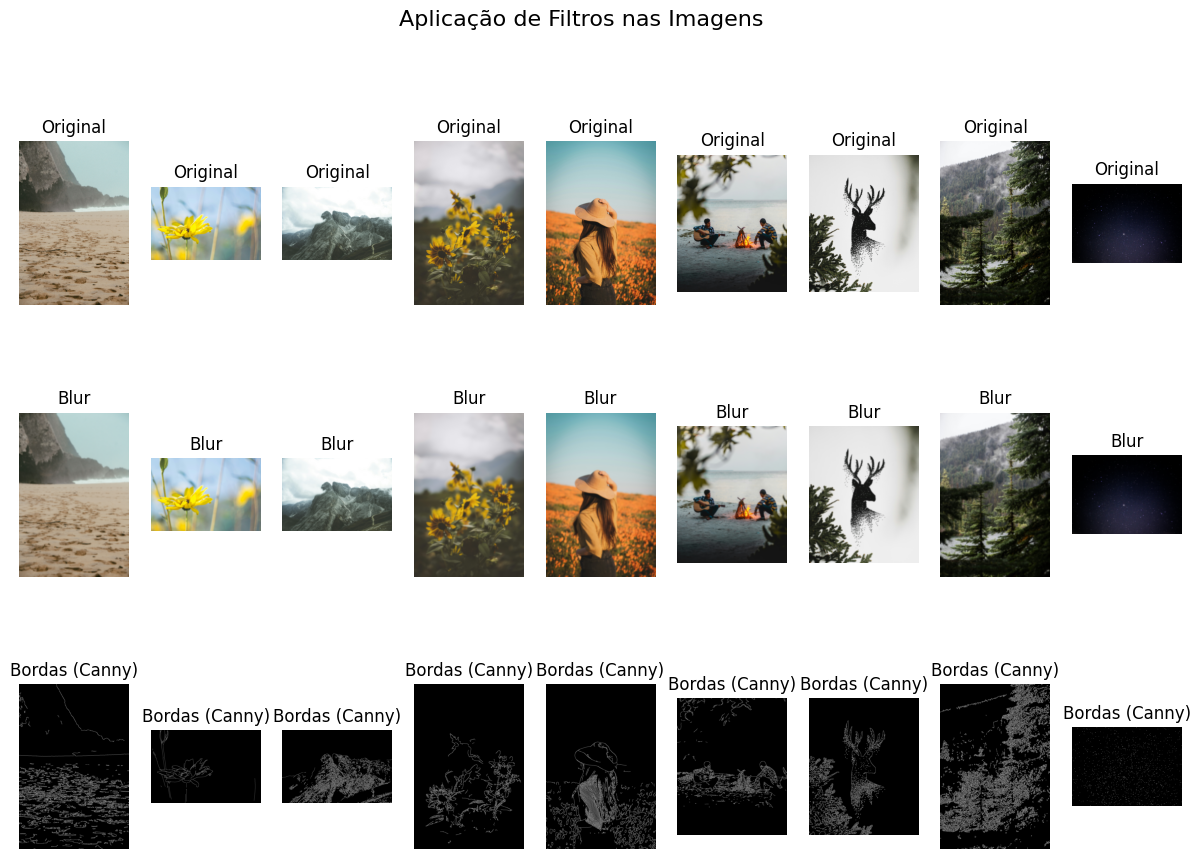

In [7]:
# Aplicar filtros nas imagens
plt.figure(figsize=(15, 10))
for i in range(num_images_to_display):
    img_path = image_files[i]
    img = cv2.imread(img_path)
    if img is None:
        print(f"Erro: Não foi possível carregar a imagem {img_path}.")
        continue
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Converter para RGB

    # Aplicar filtro de blur
    blurred_img = cv2.GaussianBlur(img, (15, 15), 0)

    # Aplicar filtro de detecção de bordas (Canny)
    edges_img = cv2.Canny(img, 100, 200)

    # Exibir imagem original
    plt.subplot(3, num_images_to_display, i + 1)
    plt.imshow(img)
    plt.title("Original")
    plt.axis('off')

    # Exibir imagem com blur
    plt.subplot(3, num_images_to_display, num_images_to_display + i + 1)
    plt.imshow(blurred_img)
    plt.title("Blur")
    plt.axis('off')

    # Exibir imagem com detecção de bordas
    plt.subplot(3, num_images_to_display, 2 * num_images_to_display + i + 1)
    plt.imshow(edges_img, cmap='gray')
    plt.title("Bordas (Canny)")
    plt.axis('off')

plt.suptitle("Aplicação de Filtros nas Imagens", fontsize=16)
plt.show()

# Essas duas análises adicionam um nível mais detalhado

## Distribuição de Cores Dominantes
Utiliza o algoritmo K-means para extrair as cores dominantes das imagens, permitindo uma análise da paleta de cores predominante no dataset.

## Análise de Bordas e Detecção de Contornos
Aplica a detecção de bordas (Canny) para examinar a complexidade visual das imagens, ajudando a entender a riqueza de detalhes das paisagens.

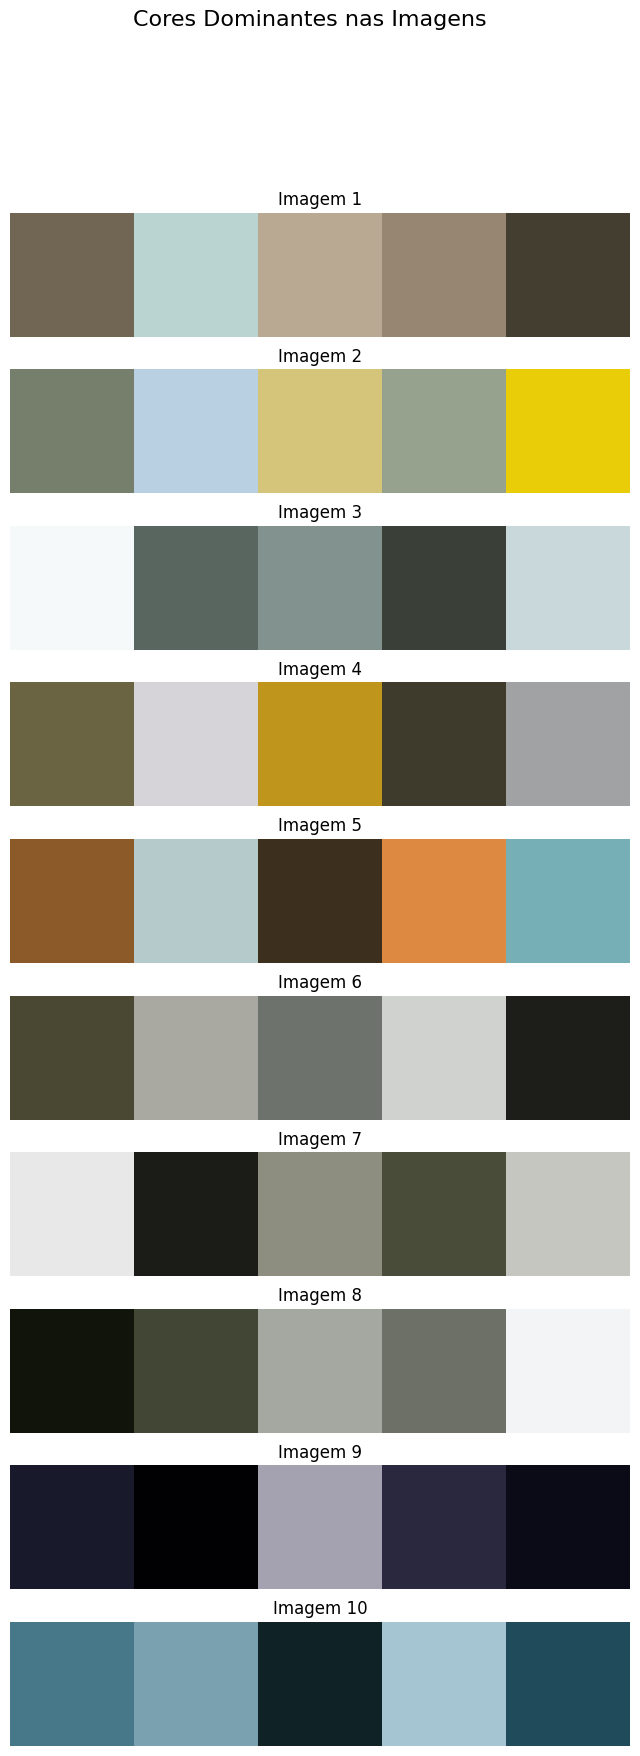

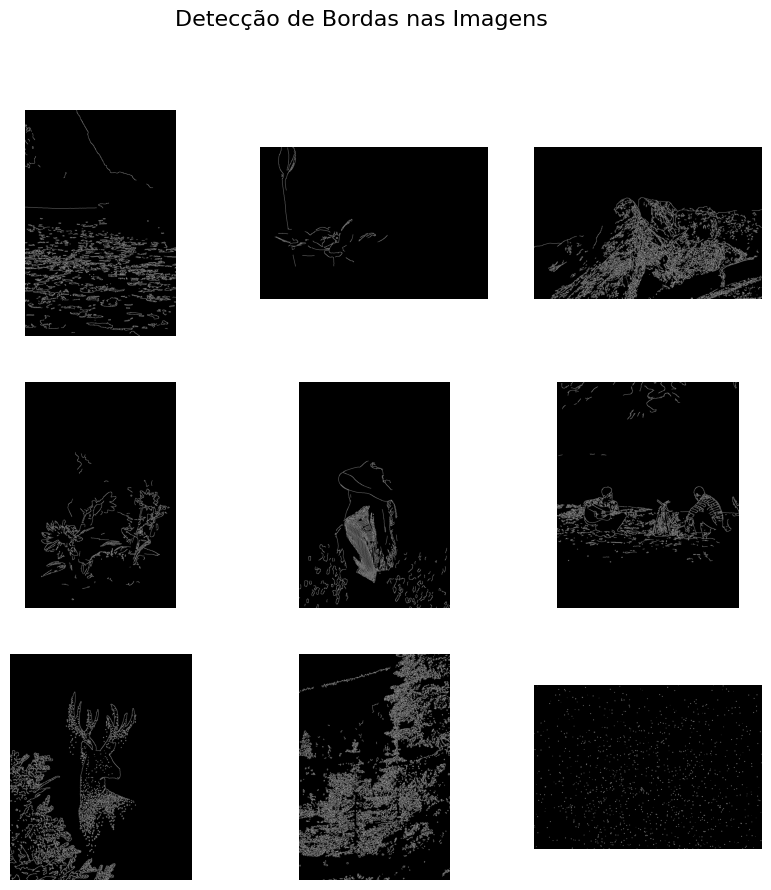

In [8]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Caminho do dataset
DATA_DIR = '/kaggle/input/ulid25k'  # Ajuste conforme necessário

# Listar arquivos .png no dataset
image_files = []
for root, _, files in os.walk(DATA_DIR):
    for file in files:
        if file.endswith('.png'):
            image_files.append(os.path.join(root, file))

# Função para extrair cores dominantes usando K-Means
def get_dominant_colors(image_path, k=5):
    img = cv2.imread(image_path)
    if img is None:
        return None
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.reshape((-1, 3))
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(img)
    return kmeans.cluster_centers_.astype(int)

# Analisar cores das primeiras 10 imagens
dominant_colors = []
num_images = min(10, len(image_files))
for i in range(num_images):
    colors = get_dominant_colors(image_files[i])
    if colors is not None:
        dominant_colors.append(colors)

# Exibir cores dominantes
fig, axes = plt.subplots(num_images, 1, figsize=(8, num_images * 2))
for i, colors in enumerate(dominant_colors):
    axes[i].imshow([colors])
    axes[i].axis('off')
    axes[i].set_title(f'Imagem {i + 1}')
plt.suptitle('Cores Dominantes nas Imagens', fontsize=16)
plt.show()

# Função para aplicar detecção de bordas Canny
def detect_edges(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        return None
    edges = cv2.Canny(img, 100, 200)
    return edges

# Aplicar detecção de bordas nas primeiras 9 imagens
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
for i in range(min(9, len(image_files))):
    edges = detect_edges(image_files[i])
    if edges is not None:
        row, col = divmod(i, 3)
        axes[row, col].imshow(edges, cmap='gray')
        axes[row, col].axis('off')
plt.suptitle('Detecção de Bordas nas Imagens', fontsize=16)
plt.show()
